# A Large Scale Fish Dataset
- A Large-Scale Dataset for Fish Segmentation and Classification<br>
https://www.kaggle.com/crowww/a-large-scale-fish-dataset

In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls datasets/Fish_Dataset/Fish_Dataset

'Black Sea Sprat'/  'Red Mullet'/                    Shrimp/
'Gilt-Head Bream'/  'Red Sea Bream'/                'Striped Red Mullet'/
'Hourse Mackerel'/  'Sea Bass'/                      Trout/
 README.txt          Segmentation_example_script.m   license.txt


((445, 590, 3), (445, 590, 3))

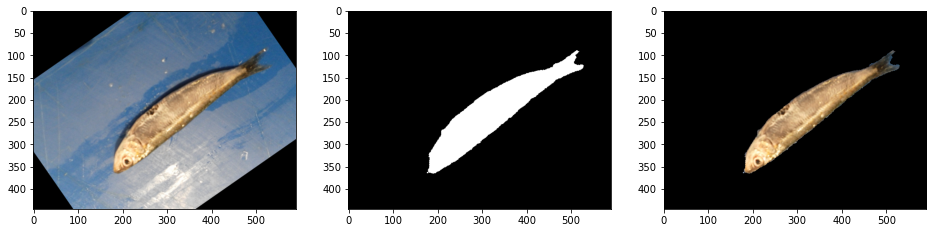

In [3]:
path1 = './datasets/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'
path2= './datasets/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00001.png'

sample = img.imread(path1)
mask = img.imread(path2)

# 2차원인 mask를 3차원으로 만든다.
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

fig = plt.figure(figsize=(16, 16))
# sample * mask를 통해 배경을 지운다. (0인 부분은 값이 사라진다.)
for idx, img in enumerate([sample, mask, sample*mask]):
    fig.add_subplot(1, 3, idx+1)
    plt.imshow(img)

np.array(sample).shape, np.array(mask).shape

In [ ]:
import os
from PIL import Image
import matplotlib.image as img

path_list = []

# 물고기 폴더 경로를 찾는다.
def search(dirname):
    global path_list
    try:
        filenames = os.listdir(dirname)
        if len(filenames) == 2:
            file_name = filenames[0] if len(filenames[0]) < len(filenames[1]) else filenames[1]
            path_list.append(dirname + '/' + file_name)
        else:
            for filename in filenames:
                full_filename = os.path.join(dirname, filename)
                if os.path.isdir(full_filename):
                    search(full_filename)
    except PermissionError:
        pass

    
search('./datasets/')

for path in path_list:
    # 새로운 폴더를 생성한다.
    new_folder = './datasets/datasets/'+'/'.join(path.split('/')[3:])
    if not os.path.exists(new_folder): 
        os.makedirs(new_folder)
    print(new_folder)
    
    # 이미지는 00001.png ~ 01000.png까지 존재한다.
    for i in range(1, 1001):
        file = str(i).zfill(5) + '.png'
        origin_path = path + '/' + file
        gt_path = path + ' GT/' + file
        save_path = new_folder + '/' + file
        
        sample = img.imread(origin_path)
        mask = img.imread(gt_path)
        
        mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        image = Image.fromarray((sample * mask * 255).astype('uint8'))
        image.save(save_path)

완료 후 다음과 같은 작업을 추가적으로 진행했다
- ./datasets/Fish_Dataset 디렉토리를 삭제
- 디렉토리명을 ./datasets/datasets 에서 ./datasets/Fish_Dataset 으로 변경